In [39]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import datetime
import re

In [65]:
search_word = '코로나'
start_date = datetime.datetime(year=2019, month=12, day=1)
end_date = datetime.datetime(year=2020, month=7, day=31)

now_date = start_date
covid_trend = []

while True:
    now_date_str1 = '{}.{:02d}.{:02d}'.format(now_date.year,now_date.month,now_date.day)
    now_date_str2 = '{}{:02d}{:02d}'.format(now_date.year,now_date.month,now_date.day)
    URL = 'https://search.naver.com/search.naver?&where=news&query={0}&sm=tab_pge&sort=0&photo=0&field=0&reporter_article=&pd=3&ds={1}&de={1}&docid=&nso=so:r,p:from{2}to{2},a:all&mynews=0&cluster_rank=34&start=1'.format(search_word, now_date_str1, now_date_str2)

    r = requests.get(URL)
    sp = BeautifulSoup(r.text, 'html.parser')
    try:
        page_count = sp.select_one('div.title_desc span').text
        page_count = page_count.replace(',','')
        page_count = re.search('(?<=\/).*(?=건)', page_count)
        page_count = int(page_count.group())
    except:
        page_count = 0
    
    covid_trend.append([now_date, page_count])

    if now_date == end_date:
        break
    now_date += datetime.timedelta(days=1)

In [ ]:
https://search.naver.com/search.naver?&where=news&query=코로나&sm=tab_pge&sort=0&photo=0&field=0&reporter_article=&pd=3&ds=2019.12.22&de=2019.12.22&docid=&nso=so:r,p:from20191222to20191222,a:all&mynews=0&cluster_rank=34&start=1

In [67]:
covid_df = pd.DataFrame(covid_trend)
covid_df[covid_df[1]==0]

,0,1
21,2019-12-22,0


In [96]:
covid_df.reset_index(inplace=True)

In [97]:
covid_df.to_json('covid_news.json')

In [98]:
covid_df

,0,1
0,2019-12-01,2
1,2019-12-02,10
2,2019-12-03,10
3,2019-12-04,10
4,2019-12-05,4
...,...,...
239,2020-07-27,19742
240,2020-07-28,18714
241,2020-07-29,18247
242,2020-07-30,19542


In [92]:
covid_df[covid_df[1]<10000].tail(50) 

,1
0,
2020-01-16,126
2020-01-17,138
2020-01-18,27
2020-01-19,49
2020-01-20,959
2020-01-21,1374
2020-01-22,2131
2020-01-23,2401
2020-01-24,1650


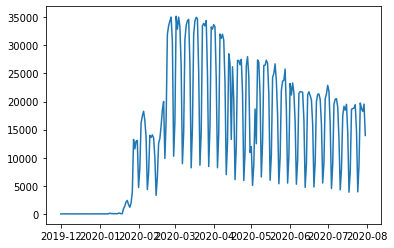

In [89]:
import matplotlib.pyplot as plt
plt.plot(covid_df)

In [ ]:
# 1주일, 2일씩 반복되는 이유?

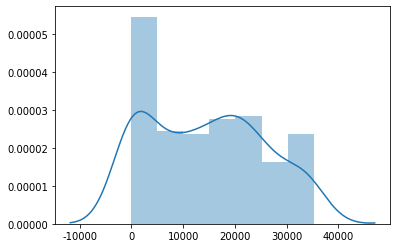

In [87]:
import seaborn as sb
# covid_df.set_index(0, inplace= True)
sb.distplot(covid_df)

In [74]:
pd.read_json('insta.json')

,date,content
0,2020-08-05 20:12:27,홈쇼핑돌려보다 질러버렸다....\n운동할때 써야지.\n\n#지름신 #홈쇼핑 #바르셀...
1,2020-08-05 19:43:07,홈쇼핑 양념 닭다리 촬영📸\n\n#홈쇼핑 #영ᄉ...
2,2020-08-05 19:30:22,오늘 여러번 던져지는 민서씨ㅋㅋㅋㅋ\n넌 즐겁고 아빠는 빡시네~~~\n4시간 지나니...
3,2020-08-05 19:29:07,#한남검단산#가죽자켓#겨울모자#유성맛집#클럽룩#게#해산물#장어탕#된장찌개#분식집#짬...
4,2020-08-05 19:07:40,-\n오늘은\n#스트리트파이터 👊\n#춘리 갬성ᄋ...
...,...,...
480,2020-07-31 02:27:38,메이크업 아티스트 라이는 오랜 경력을 바탕으로 늘 고객님 한분 한분의 만족도를 높이...
481,2020-07-30 21:03:32,클리오 틴트립스틱방송♡\n예쁜 가은언니랑 수연이와 함께ㅋ\n방송해본 립제품중에 젤 ...
482,2020-07-30 20:08:33,-\n#잼라이브 #요즘쇼핑 할때마다 진짜 대바...
483,2020-07-29 19:00:51,👍\n난 원래 안짖지만..\n울엄마와 감독님 센스에 짖어버렸다 왁왁\n\n오늘도 #...


In [76]:
import json

In [84]:
#insta test
search_word = '홈쇼핑'
URL = 'http://instagram.com/graphql/query/?query_hash=7dabc71d3e758b1ec19ffb85639e427b&variables={"tag_name":"' + search_word + '","first":12}'
end_cursor=True
result = []
while True:
    r = requests.get(URL)
    sources = json.loads(r.text)['data']['hashtag']['edge_hashtag_to_media']['edges'] #필요한 데이터

    for source in sources:
        date = datetime.datetime.fromtimestamp(source['node']['taken_at_timestamp'])
        try:
            content = source['node']['edge_media_to_caption']['edges'][0]['node']['text']
        except:
            content = ''
        result.append([date, content])

    end_cursor = json.loads(r.text)['data']['hashtag']['edge_hashtag_to_media']['page_info']['end_cursor'] #Next Page 확인
    if end_cursor != None:
        URL = 'http://instagram.com/graphql/query/?query_hash=7dabc71d3e758b1ec19ffb85639e427b&variables={"tag_name":"' + search_word + '","first":12'+',"after":"'+end_cursor+'"}'

# 자꾸 에러 !

IndexError: list index out of range